In [9]:
import pandas as pd
from collections import Counter

# consensus list erstellen

In [10]:
def process_file(file_path):
    df = pd.read_csv(file_path, sep='\t')
    
    spalte = 'zeta_score'
    
    df_cleaned = df.dropna(subset=[spalte])
    
    df_sorted = df_cleaned.sort_values(by=spalte)
    
    low_10_percent = df_sorted.head(int(0.05 * len(df_sorted)))
    
    high_10_percent = df_sorted.tail(int(0.05 * len(df_sorted)))
    
    low_words = set(low_10_percent['word'])
    high_words = set(high_10_percent['word'])
    
    return low_words, high_words

In [11]:
file_paths = [
    'C:/Users/jwieb/Documents/Korpora_ZETA/zeta_scores_5000.csv', 'C:/Users/jwieb/Documents/Korpora_ZETA/zeta_scores_6000.csv', 'C:/Users/jwieb/Documents/Korpora_ZETA/zeta_scores_7000.csv', 'C:/Users/jwieb/Documents/Korpora_ZETA/zeta_scores_5500.csv','C:/Users/jwieb/Documents/Korpora_ZETA/zeta_scores_7500.csv',
    'C:/Users/jwieb/Documents/Korpora_ZETA/zeta_scores_3500.csv', 'C:/Users/jwieb/Documents/Korpora_ZETA/zeta_scores_4000.csv', 'C:/Users/jwieb/Documents/Korpora_ZETA/zeta_scores_3000.csv', 'C:/Users/jwieb/Documents/Korpora_ZETA/zeta_scores_4500.csv','C:/Users/jwieb/Documents/Korpora_ZETA/zeta_scores_6500.csv'
]

low_word_counter = Counter()
high_word_counter = Counter()

In [15]:
with open('C:/Users/jwieb/OneDrive - uni-bielefeld.de/Bachelorarbeit/consensus_high.txt', 'w', encoding='utf-8') as f:
    for word in consensus_high:
        f.write(f"{word}\n")

In [13]:
consensus_high

{'ader',
 'ahnden',
 'ahnung',
 'albano',
 'albanos',
 'ansehn',
 'argwohn',
 'aussage',
 'beantworten',
 'befehl',
 'befehlen',
 'befragen',
 'begebenheit',
 'begebenheite',
 'begierig',
 'beistand',
 'beleidigen',
 'benachbart',
 'beschließen',
 'beschwören',
 'bestätigen',
 'beten',
 'betet',
 'bette',
 'betäubung',
 'bewußtlos',
 'bitte',
 'bleich',
 'blut',
 'blutend',
 'blutig',
 'botschaft',
 'braut',
 'brechen',
 'bund',
 'buße',
 'bös',
 'dein',
 'deinen',
 'deinig',
 'dicht',
 'dolch',
 'drohen',
 'dumpf',
 'durchbohren',
 'düster',
 'düstern',
 'ehedem',
 'eid',
 'eilen',
 'eilt',
 'einsam',
 'einsamkeit',
 'einst',
 'eiskalt',
 'enden',
 'entdeckung',
 'entfliehen',
 'entfloh',
 'entflohen',
 'entkommen',
 'entreißen',
 'entsetzen',
 'erfüllung',
 'ergriff',
 'ermorden',
 'erscheinung',
 'erschrocken',
 'erstaunen',
 'erwachen',
 'erwartet',
 'erzählung',
 'eur',
 'eure',
 'eurer',
 'feind',
 'fesseln',
 'finster',
 'flamme',
 'flehen',
 'fliehen',
 'flucht',
 'fußnoten',
 

In [ ]:
# Speichern der gefilterten Wörter in eine .txt-Datei mit Zeilenumbrüchen
with open('C:/Users/jwieb/Documents/consensus_list.txt', 'w') as f:
    f.write('\n'.join(filtered_words['word']))

In [14]:
len(consensus_high)

303

In [19]:
consensus_low

{'abwechslung',
 'allerhand',
 'alsdann',
 'amerika',
 'anfangen',
 'angreifen',
 'anlage',
 'ansicht',
 'arbeiter',
 'artig',
 'aufgabe',
 'aufregung',
 'aufstellen',
 'ausdruck',
 'ausdrücken',
 'ausnahme',
 'aussehen',
 'ausüben',
 'autor',
 'b',
 'beamter',
 'bedürfnis',
 'behaglich',
 'behandeln',
 'bein',
 'bemerkung',
 'bequem',
 'bescheiden',
 'besehen',
 'besitzen',
 'beständig',
 'bevor',
 'bibliothek',
 'bilden',
 'bildung',
 'brauchen',
 'braun',
 'brav',
 'brot',
 'brunnen',
 'buch',
 'bunt',
 'bürgerlich',
 'bürgerlichen',
 'd',
 'dar',
 'darstellen',
 'darstellung',
 'dergleich',
 'dergleichen',
 'deutsch',
 'deutsche',
 'dichter',
 'drein',
 'dreißig',
 'drucken',
 'dumm',
 'dutzend',
 'echt',
 'eifersucht',
 'eifrig',
 'eigenschaft',
 'einfach',
 'einigermaßen',
 'einrichten',
 'einrichtung',
 'einzeln',
 'element',
 'empfinden',
 'england',
 'englisch',
 'engländer',
 'entstehen',
 'erfindung',
 'ernsthaft',
 'erziehung',
 'essen',
 'europa',
 'fast',
 'fein',
 'ferne

In [20]:
len(consensus_low)

314

# semantische Felder auslesen

In [189]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
from tqdm import tqdm

In [190]:
def find_word_in_xml(word, xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        
        for elem in root.iter():
            if elem.text and word in elem.text:
                return True
    except Exception as e:
        print(f"Fehler beim Verarbeiten der Datei {xml_file}: {e}")
    return False

def match_words_in_xml(df, xml_folder_path):
    file_names = [f for f in os.listdir(xml_folder_path) if f.endswith('.xml')]
    
    result_df = df.copy()

    for xml_file in file_names:
        result_df[xml_file] = False
    
    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Wörter werden verarbeitet"):
        word = row['word']
        
        for xml_file in tqdm(file_names, desc=f"Dateien werden für '{word}' durchsucht", leave=False):
            xml_file_path = os.path.join(xml_folder_path, xml_file)
            
            if find_word_in_xml(word, xml_file_path):
                result_df.at[index, xml_file] = True

    return result_df

In [191]:
df_consensus_high = pd.DataFrame(consensus_high, columns=['word'])

In [192]:
xml_folder_path = "C:/Users/jwieb/Documents/semantic-fields-main/semantic-fields-main/GN_V160/just_wordfields"

In [16]:
result_df = match_words_in_xml(df_consensus_high, xml_folder_path)

NameError: name 'match_words_in_xml' is not defined

In [194]:
result_df

,word,adj.Allgemein.xml,adj.Bewegung.xml,adj.Gefuehl.xml,adj.Gesellschaft.xml,adj.Koerper.xml,adj.Kognition.xml,adj.Menge.xml,adj.natPhaenomen.xml,adj.Ort.xml,...,verben.Kognition.xml,verben.Kommunikation.xml,verben.Konkurrenz.xml,verben.Kontakt.xml,verben.natPhaenomen.xml,verben.Ort.xml,verben.Perzeption.xml,verben.Schoepfung.xml,verben.Veraenderung.xml,verben.Verbrauch.xml
0,einsam,False,False,True,False,False,False,False,False,True,...,True,True,False,False,False,True,False,False,True,False
1,gelübde,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,ändern,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,True,True,True,True,False
3,weinen,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,False,True,False
4,starr,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,inbrunst,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
299,entdeckung,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
300,mönch,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
301,drohen,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [202]:
filtered_words = result_df[
    (result_df['adj.Gefuehl.xml'] == True) | 
    (result_df['nomen.Gefuehl.xml'] == True) | 
    (result_df['verben.Gefuehl.xml'] == True)
]

print(filtered_words['word'])

0         einsam
3         weinen
6           hold
7             ha
17         bitte
         ...    
285        dumpf
287       kummer
290    zerreißen
292     täuschen
302        betet
Name: word, Length: 104, dtype: object


# SentiArt Rover bedienen

In [201]:
with open('C:/Users/jwieb/Documents/filtered_words_nomen.txt', 'w') as f:
    f.write('\n'.join(filtered_words['word']))

In [254]:
import itertools

with open('C:/Users/jwieb/Documents/filtered_words_nomen_clean.txt', 'r') as f:
    wort_liste = [line.strip() for line in f]

paerchen = list(itertools.combinations(wort_liste, 2))

with open('C:/Users/jwieb/Documents/wort_paerchen_nomen_clean.txt', 'w') as f:
    f.write("data:\n\n")
    for paar in paerchen:
        f.write(f"{paar[0]}, {paar[1]}\n")


In [139]:
paerchen

[('Bitte', 'Mord'),
 ('Bitte', 'Feind'),
 ('Bitte', 'Erfüllung'),
 ('Bitte', 'Gewißheit'),
 ('Bitte', 'Wache'),
 ('Bitte', 'Sage'),
 ('Bitte', 'Blut'),
 ('Bitte', 'Eid'),
 ('Bitte', 'Vertrauen'),
 ('Bitte', 'Tür'),
 ('Bitte', 'Wut'),
 ('Bitte', 'Schauer'),
 ('Bitte', 'Schrei'),
 ('Bitte', 'Qual'),
 ('Bitte', 'Ahnung'),
 ('Bitte', 'Mitleid'),
 ('Bitte', 'Schlag'),
 ('Bitte', 'Bund'),
 ('Bitte', 'Zorn'),
 ('Bitte', 'Kummer'),
 ('Mord', 'Feind'),
 ('Mord', 'Erfüllung'),
 ('Mord', 'Gewißheit'),
 ('Mord', 'Wache'),
 ('Mord', 'Sage'),
 ('Mord', 'Blut'),
 ('Mord', 'Eid'),
 ('Mord', 'Vertrauen'),
 ('Mord', 'Tür'),
 ('Mord', 'Wut'),
 ('Mord', 'Schauer'),
 ('Mord', 'Schrei'),
 ('Mord', 'Qual'),
 ('Mord', 'Ahnung'),
 ('Mord', 'Mitleid'),
 ('Mord', 'Schlag'),
 ('Mord', 'Bund'),
 ('Mord', 'Zorn'),
 ('Mord', 'Kummer'),
 ('Feind', 'Erfüllung'),
 ('Feind', 'Gewißheit'),
 ('Feind', 'Wache'),
 ('Feind', 'Sage'),
 ('Feind', 'Blut'),
 ('Feind', 'Eid'),
 ('Feind', 'Vertrauen'),
 ('Feind', 'Tür'),
 ('Feind'

In [66]:
df_paerchen = pd.read_csv('C:/Users/jwieb/Documents/Wortpaerchen_batches/merged_output.tsv', sep='\t')

In [67]:
df_paerchen

,input1,synset1ID,synset1Cat,synset1Class,synset1Hypernyms,input2,synset2ID,synset2Cat,synset2Class,synset2Hypernyms,SimplePath,LeacockAndChodorow,WuAndPalmer,Resnik,Lin,JiangAndConrath
0,einsam,536.0,adj,Gefuehl,"[freudlos, traurig]",weinen,64157.0,verben,Gefuehl,[Gefühle ausdrücken],NaN,NaN,NaN,NaN,NaN,NaN
1,einsam,536.0,adj,Gefuehl,"[freudlos, traurig]",weinen,52979.0,verben,Gefuehl,[Gefühle ausdrücken],NaN,NaN,NaN,NaN,NaN,NaN
2,einsam,536.0,adj,Gefuehl,"[freudlos, traurig]",weinen,54425.0,verben,Koerperfunktion,"[absondern, sekretieren]",NaN,NaN,NaN,NaN,NaN,NaN
3,einsam,2330.0,adj,Ort,[lokalisationsspezifisch],weinen,64157.0,verben,Gefuehl,[Gefühle ausdrücken],NaN,NaN,NaN,NaN,NaN,NaN
4,einsam,2330.0,adj,Ort,[lokalisationsspezifisch],weinen,52979.0,verben,Gefuehl,[Gefühle ausdrücken],NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8289,einst,NaN,NaN,NaN,NaN,kund,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8290,einst,NaN,NaN,NaN,NaN,r�tsel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8291,einst,NaN,NaN,NaN,NaN,raub,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8292,einst,NaN,NaN,NaN,NaN,heimlich,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
def split_word_pairs(input_file, output_prefix, batch_size=200):
    with open(input_file, 'r') as file:
        word_pairs = [line.strip() for line in file if line.strip()]

    num_files = (len(word_pairs) + batch_size - 1) // batch_size

    for i in range(num_files):
        batch = word_pairs[i * batch_size:(i + 1) * batch_size]
        
        output_file = f"{output_prefix}_{i+1}.txt"

        with open(output_file, 'w') as output:
            output.write("data:\n\n")  # Header für die Dateien
            for pair in batch:
                output.write(f"{pair}\n")

        print(f"{output_file} mit {len(batch)} Wortpaaren erstellt.")


input_file = 'C:/Users/jwieb/Documents/wort_paerchen_adj_clean.txt'
output_prefix = 'C:/Users/jwieb/Documents/wort_paerchen_adj_clean/output'
split_word_pairs(input_file, output_prefix)


C:/Users/jwieb/Documents/wort_paerchen_adj_clean/output_1.txt mit 200 Wortpaaren erstellt.
C:/Users/jwieb/Documents/wort_paerchen_adj_clean/output_2.txt mit 11 Wortpaaren erstellt.


In [269]:
import pandas as pd
import os

def merge_tsv_files(input_folder, output_file):
    tsv_files = [f for f in os.listdir(input_folder) if f.endswith('.tsv')]

    df_list = []

    for tsv_file in tsv_files:
        file_path = os.path.join(input_folder, tsv_file)
        df = pd.read_csv(file_path, sep='\t')
        
        df_list.append(df)

    merged_df = pd.concat(df_list, ignore_index=True)

    merged_df.to_csv(output_file, sep='\t', index=False)

    print(f"Alle TSV-Dateien wurden erfolgreich in '{output_file}' zusammengeführt.")

input_folder = 'C:/Users/jwieb/Documents/wort_paerchen_nomen_clean'  # Verzeichnis, in dem sich die TSV-Dateien befinden
output_file = 'C:/Users/jwieb/Documents/wort_paerchen_nomen_clean/merged_output.tsv'  # Name der Ausgabedatei
merge_tsv_files(input_folder, output_file)


Alle TSV-Dateien wurden erfolgreich in 'C:/Users/jwieb/Documents/wort_paerchen_nomen_clean/merged_output.tsv' zusammengeführt.


In [147]:
df

,input1,synset1ID,synset1Cat,synset1Class,synset1Hypernyms,input2,synset2ID,synset2Cat,synset2Class,synset2Hypernyms,SimplePath,LeacockAndChodorow,WuAndPalmer,Resnik,Lin,JiangAndConrath
0,Bitte,30959,nomen,Kommunikation,[Wunsch],Mord,20741,nomen,Geschehen,[Bluttat],0.65714,0.28424,0.33333,0.07994,0.22151,0.71904
1,Bitte,30959,nomen,Kommunikation,[Wunsch],Feind,34207,nomen,Mensch,"[Gegner, Gegnerin, Kontrahent, Kontrahentin, O...",0.48571,0.17834,0.10000,0.02941,0.08022,0.66274
2,Bitte,30959,nomen,Kommunikation,[Wunsch],Erfüllung,109483,nomen,Gefuehl,"[Befriedigung, Genugtuung, Genügen]",0.85714,0.50000,0.73684,0.20228,0.51792,0.81172
3,Bitte,30959,nomen,Kommunikation,[Wunsch],Erfüllung,22520,nomen,Geschehen,[Vollendung],0.68571,0.30657,0.35294,0.07994,0.21323,0.70502
4,Bitte,30959,nomen,Kommunikation,[Wunsch],Gewißheit,16004,nomen,Gefuehl,[Grundgefühl],0.85714,0.50000,0.73684,0.20228,0.62957,0.88099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,Bund,24773,nomen,Gruppe,[Militär],Kummer,16204,nomen,Gefuehl,"[Emotion, Empfinden, Empfindung, Feeling, Gefü...",0.42857,0.15041,0.00000,0.00000,0.00000,0.62605
625,Bund,33545,nomen,Menge,[nichtdefinite Raumeinheit],Kummer,16204,nomen,Gefuehl,"[Emotion, Empfinden, Empfindung, Feeling, Gefü...",0.62857,0.26356,0.00000,0.00000,0.00000,0.61967
626,Bund,23378,nomen,Gruppe,"[Zusammenschluss, Zusammenschluß]",Kummer,16204,nomen,Gefuehl,"[Emotion, Empfinden, Empfindung, Feeling, Gefü...",0.54286,0.20938,0.00000,0.00000,0.00000,0.65785
627,Bund,73181,nomen,Artefakt,"[Bekleidungsteil, Kleidungsteil]",Kummer,16204,nomen,Gefuehl,"[Emotion, Empfinden, Empfindung, Feeling, Gefü...",0.62857,0.26356,0.00000,0.00000,0.00000,0.61971


# FINAL NOMEN

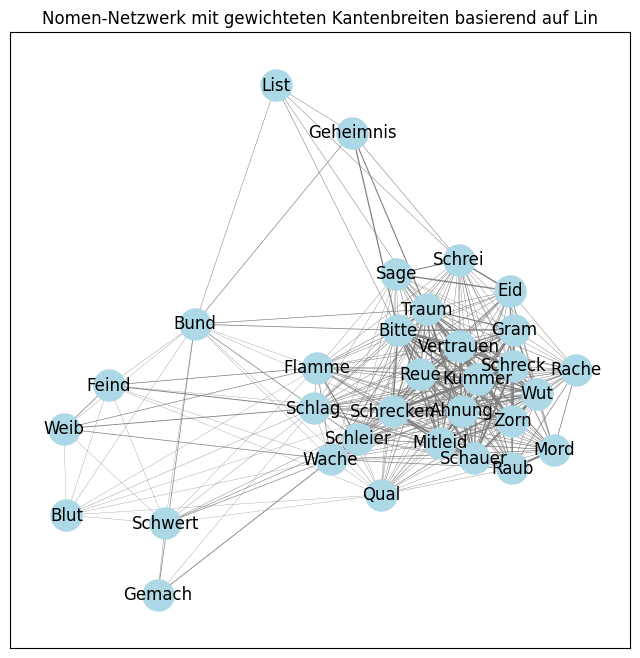

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/jwieb/Documents/wort_paerchen_nomen_clean/merged_output.tsv', sep='\t')

G = nx.Graph()

threshold = 0.1  # Schwellenwert

for _, row in df.iterrows():
    if pd.notna(row['input1']) and pd.notna(row['input2']) and pd.notna(row['Lin']):
        weight = row['Lin']
        if weight >= threshold:
            G.add_edge(row['input1'], row['input2'], weight=weight)

if len(G.nodes) == 0:
    raise ValueError("Das Netzwerk hat keine gültigen Knoten.")

edges = G.edges(data=True)
edge_weights = [edge[2]['weight'] for edge in edges]

scaled_edge_weights = [w * 2 for w in edge_weights]

if len(G.edges) > 0:
    plt.figure(figsize=(8, 8))

    pos = nx.spring_layout(G, seed=42)

    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    nx.draw_networkx_edges(G, pos, edge_color='grey', width=scaled_edge_weights)

    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.title('Nomen-Netzwerk mit gewichteten Kantenbreiten basierend auf Lin')
    plt.savefig("C:/Users/jwieb/OneDrive - uni-bielefeld.de/Bachelorarbeit/Grafiken/netzwerk_nomen.png", format="png", dpi=300)
    plt.show()
else:
    print("Keine Kanten vorhanden, um das Netzwerk zu zeichnen.")

# FINAL VERBEN

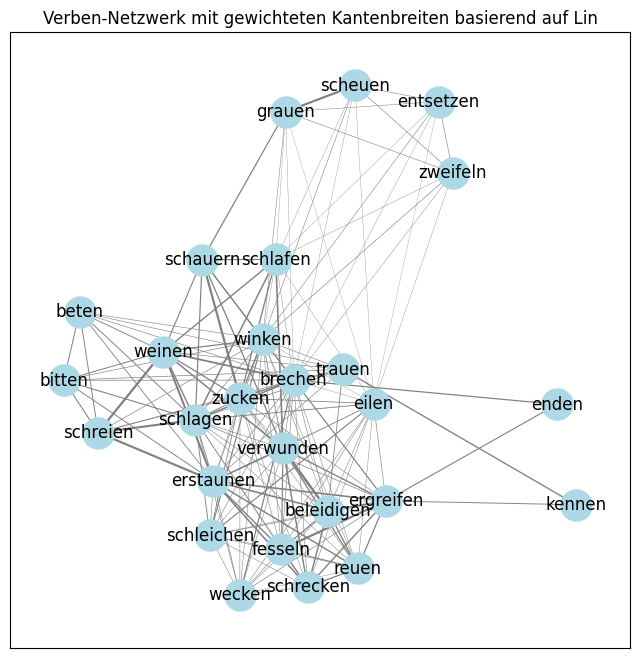

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/jwieb/Documents/wort_paerchen_verben_clean/merged_output.tsv', sep='\t')

G = nx.Graph()

threshold = 0.1  #Schwellenwert

for _, row in df.iterrows():
    if pd.notna(row['input1']) and pd.notna(row['input2']) and pd.notna(row['Lin']):
        weight = row['Lin']
        if weight >= threshold:
            G.add_edge(row['input1'], row['input2'], weight=weight)

if len(G.nodes) == 0:
    raise ValueError("Das Netzwerk hat keine gültigen Knoten.")

edges = G.edges(data=True)
edge_weights = [edge[2]['weight'] for edge in edges]

scaled_edge_weights = [w * 2 for w in edge_weights]  # Skaliere den Wert für bessere Visualisierung

if len(G.edges) > 0:
    plt.figure(figsize=(8, 8))

    pos = nx.spring_layout(G, seed=43) 
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    nx.draw_networkx_edges(G, pos, edge_color='grey', width=scaled_edge_weights)

    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.title('Verben-Netzwerk mit gewichteten Kantenbreiten basierend auf Lin')
    plt.savefig("C:/Users/jwieb/OneDrive - uni-bielefeld.de/Bachelorarbeit/Grafiken/netzwerk_verben.png", format="png", dpi=300)
    plt.show()
else:
    print("Keine Kanten vorhanden, um das Netzwerk zu zeichnen.")

# FINAL ADJ

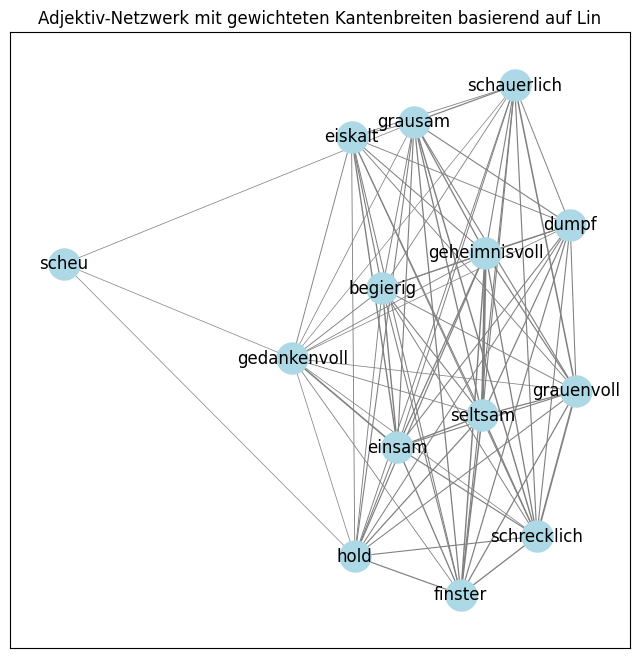

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/jwieb/Documents/wort_paerchen_adj_clean/merged_output.tsv', sep='\t')

G = nx.Graph()

threshold = 0.1  #Schwellenwert einrichten

for _, row in df.iterrows():
    if pd.notna(row['input1']) and pd.notna(row['input2']) and pd.notna(row['Lin']):
        weight = row['Lin']
        if weight >= threshold:
            G.add_edge(row['input1'], row['input2'], weight=weight)

if len(G.nodes) == 0:
    raise ValueError("Das Netzwerk hat keine gültigen Knoten.")

edges = G.edges(data=True)
edge_weights = [edge[2]['weight'] for edge in edges]

scaled_edge_weights = [w * 2 for w in edge_weights]

if len(G.edges) > 0:
    plt.figure(figsize=(8, 8))

    pos = nx.spring_layout(G, seed=41)

    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    nx.draw_networkx_edges(G, pos, edge_color='grey', width=scaled_edge_weights)

    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.title('Adjektiv-Netzwerk mit gewichteten Kantenbreiten basierend auf Lin')
    plt.savefig("C:/Users/jwieb/OneDrive - uni-bielefeld.de/Bachelorarbeit/Grafiken/netzwerk_adj.png", format="png", dpi=300)
    plt.show()
else:
    print("Keine Kanten vorhanden, um das Netzwerk zu zeichnen.")